In [35]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('train.csv')s

In [37]:
df.shape

(404290, 6)

In [38]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [39]:
# to understood overall structure of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [40]:
# searchinf for null values 
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [41]:
# to find weather any column is dupliocated or not 
df.duplicated().sum()

0

In [42]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [43]:
# to check the percentage of duplicated over others
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

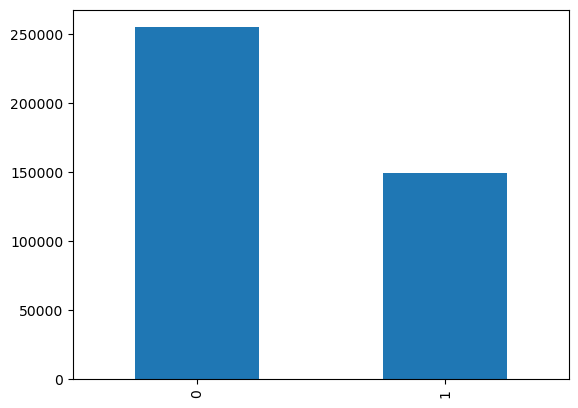

In [44]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [47]:
qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Number of unique questions" , np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number of repeated questions", x[x].shape[0])

Number of unique questions 537933
Number of repeated questions 111780


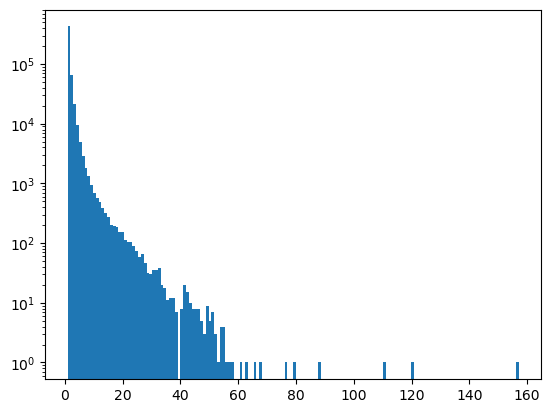

In [49]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [50]:
new_df = df.sample(3000)

In [54]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [57]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
306279,306279,429764,177642,What are the most interesting products and inn...,What are the most interesting products and inn...,0
299745,299745,422453,138361,What are foursquare's disadvantages?,Where can I buy distilled water?,0
288109,288109,17411,16340,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem...",1
310009,310009,428760,434066,What is the fill form 60/61 of SBI in ''openin...,Can I pay my FRM exam fees using SBI Yuva Debi...,0
56789,56789,99904,2765,Why did Arnab Goswami resign from Times Now?,Why did Arnab Goswami resign as the Editor-in-...,1
...,...,...,...,...,...,...
258596,258596,178741,374199,Why are my answers being deleted?,Why can I not delete one of my answers?,0
343971,343971,134887,128018,What are the best new Car technology that most...,What are the best new car products or inventio...,0
162132,162132,252466,49612,Vietnamese who speak Japanese: Where did you s...,Indonesians who speak Japanese: Where did you ...,0
287638,287638,408450,374840,How can you message someone who is not your fr...,How do I know if someone who is not my Faceboo...,0


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [72]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [73]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
306279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162132,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
287638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [81]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9994

In [83]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:48
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:21
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:21
   ---------------------------------------- 0.4/124.9 MB 1.9 MB/s eta 0:01:05
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.8/124.9 MB 2.2 MB/s eta 0:00:58
   ---------------------------------------- 0.9/124.9 MB 2.2 MB/s eta 0:00:58
   --------------------------

In [84]:
from xgboost import XGBClassifier

In [86]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
x_prd =xgb.predict(X_test)
accuracy_score(x_prd , y_test)

0.9994